# Importation des bibliothques

In [ ]:
!pip install des transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.3 MB/s 
     |████████████████████████████████| 101 kB 11.8 MB/s 
     |████████████████████████████████| 6.6 MB 42.1 MB/s 
  Created wheel for des: filename=des-1.0.6-py3-none-any.whl size=7357 sha256=3cf3226920004423b8327acd66c2438e04a088a550cacb480b9bcc42c3010e1c
  Stored in directory: /root/.cache/pip/wheels/e5/42/8a/966b0c8bcd6260de27068154b0b44d872d368a24aa2be819b4
Successfully built des


In [ ]:
%pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import seaborn
import os
import numpy as np
import pandas as pd
import torch.nn as nn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import FlaubertForSequenceClassification, FlaubertTokenizer, AdamW
# Chargement du GPU
device = torch.device("cuda")

# Importation des données

In [ ]:
#Chargement du jeu de données
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_excel("/content/drive/MyDrive/CODIF_3_MODALITES.xlsx")
df.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Libelle,CODE,CODE_NEW,CODE_NEW_3,Eff,Code_String,indiv,survey,type_question,grappe,menage,Signal,Statut,Observations
0,ACAHT ET VENTE DE PATE DE PLACALI,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,373.0,373/11,NaN,NaN,NaN
1,ACHAT DE LAIT,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Secondaire_Produits,412.0,412/10,NaN,NaN,NaN
2,ACHAT ET VENTE,55210,27,1,1129,services de restauration,3327.0,ENSESI_2016,Emploi_principal_Produits,NaN,NaN,A regarder de plus près,NaN,NaN
3,ACHAT ET VENTE DE POISSONS,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,15.0,15/16,NaN,NaN,NaN
4,ACHETE ET VEND,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,295.0,295/17,NaN,NaN,NaN
5,ACHETE LE RIZLE PREPARE AVEC SAUCE ET LE COMME...,55210,27,1,1129,services de restauration,1400.0,ENSESI_2016,Emploi_principal_Produits,NaN,NaN,NaN,NaN,NaN
6,ACHETTE ET VEND DU PAIN,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,300.0,300/15,NaN,NaN,NaN
7,ACTIVITE DE LA RESTAURATION,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,522.0,522/20,NaN,NaN,NaN
8,ACTIVITE DE LA VENTE DE BAIGNETS,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,522.0,522/9,NaN,NaN,NaN
9,ACTIVITE DE LA VENTE DE GNOMMI,55210,27,1,1129,services de restauration,NaN,ENSETE_2013,Emploi_Principal_Produits,522.0,522/9,NaN,NaN,NaN


In [ ]:
df = df[['Libelle', 'CODE_NEW_3']]
df['Libelle'] = df['Libelle'].astype(str)
df['CODE_NEW_3'] = df['CODE_NEW_3'].astype(int)
#df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Libelle = df['Libelle'].values.tolist()
CODE = df['CODE_NEW_3'].values.tolist()

In [ ]:
num_labels = len(df.iloc[:,1].unique())

In [ ]:
# split train dataset into train, validation and test sets
train_Libelle, temp_Libelle, train_CODE, temp_CODE = train_test_split(df['Libelle'], df['CODE_NEW_3'], random_state=2011, test_size=0.4)
val_Libelle, test_Libelle, val_CODE, test_CODE = train_test_split(temp_Libelle, temp_CODE, random_state = 2018, test_size = 0.5)

In [ ]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# On charge l'objet "tokenizer"de camemBERT qui va servir a encoder
# 'camebert-base' est la version de camembert qu'on choisit d'utiliser
# 'do_lower_case' à True pour qu'on passe tout en miniscule
modelname = 'flaubert/flaubert_base_uncased'
tokenizer = FlaubertTokenizer.from_pretrained(modelname,do_lower_case=True)

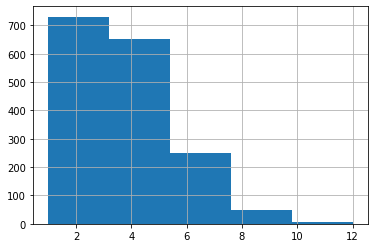

In [ ]:
# Distribution de la longueur des phrases
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_Libelle]

pd.Series(seq_len).hist(bins = 5)

In [ ]:
# Tokenisation des phases dans nos différents jeu de données avec max_length = 6 pour le padding 
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(train_Libelle,max_length = 6, pad_to_max_length=True,truncation=True,
                                           return_tensors = 'pt')

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(val_Libelle,max_length = 6,pad_to_max_length=True,truncation=True,
                                         return_tensors = 'pt')

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(test_Libelle,max_length = 4,pad_to_max_length=True,truncation=True,
                                            return_tensors = 'pt')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
## convert lists to tensors / convertion des sequences de données en tenseurs pour optimiser les calculs

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_CODE.tolist()) - 1

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_CODE.tolist()) - 1

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_CODE.tolist()) - 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy 

In [ ]:
""" Nous allons maintenant créer des chargeurs de données pour le train et l'ensemble de validation. 
    Ces chargeurs de données transmettront des lots de données de train et de données de validation en entrée du modèle pendant la phase de formation.
"""

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# Importation du Modele

In [ ]:
# On la version pre-entrainee de camemBERT 'base'
model = FlaubertForSequenceClassification.from_pretrained(
    modelname,
    num_labels = num_labels)

# push the model to GPU
model = model.to(device)

Some weights of the model checkpoint at flaubert/flaubert_base_uncased were not used when initializing FlaubertForSequenceClassification: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of FlaubertForSequenceClassification were not initialized from the model checkpoint at flaubert/flaubert_base_uncased and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for

# Hyperparametres

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2.5e-5, # Learning Rate
                  eps = 1e-8 # Epsilon
)
epochs = 30

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# Equilibre des classes

In [ ]:
# il y a un déséquilibre dans les classes c-a-d il y a assez de spam que de non spam il faut donc en tenir compte
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes = np.unique(train_CODE), y= train_CODE)
class_weights = dict(zip(np.unique(train_CODE), class_weights))

d = list(class_weights.values())
d.append(0)

print("Class Weights:",class_weights)

# converting list of class weights to a tensor
weights= torch.tensor(list(class_weights.values()),dtype=torch.float)

weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

Class Weights: {1: 0.8281938325991189, 2: 1.0053475935828877, 3: 1.2533333333333334}


# Entrainement

In [ ]:
# fonctions pour ajuster le modele

# function to train the model
def train():

  model.train()
  total_loss, total_accuracy = 0, 0
  # empty list to save model predictions
  total_preds=[]
  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]

    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)
    _, logits = model(sent_id, 
                             token_type_ids=None, 
                             attention_mask=mask, 
                             labels=labels,return_dict=False)
    # compute the loss between actual and predicted values
    loss = cross_entropy(logits, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds = logits
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds
 
    
  #return 

# Evaluation

In [ ]:
# function for evaluating the model
def evaluate():
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      #elapsed = format_time(time.time()-t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)
      #preds = logits
      _, logits = model(sent_id, 
                             token_type_ids=None, 
                             attention_mask=mask, 
                             labels=labels,return_dict=False)


      # compute the validation loss between actual and predicted values
      loss = cross_entropy(logits,labels)

      total_loss = total_loss + loss.item()
      preds = logits

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:

# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
#evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -11.456
Validation Loss: -15.959

 Epoch 2 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -16.164
Validation Loss: -17.643

 Epoch 3 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -18.046
Validation Loss: -19.778

 Epoch 4 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -19.948
Validation Loss: -21.179

 Epoch 5 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -21.351
Validation Loss: -22.143

 Epoch 6 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -22.979
Validation Loss: -23.422

 Epoch 7 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -24.509
Validation Loss: -24.722

 Epoch 8 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -25.843
Validation Loss: -25.308

 Epoch 9 / 30
  Batch    50  of     53.

Evaluating...

Training Loss: -26.902
Validation Loss: -26.110

 Epoch 10 / 30
  Batch    50  of     53.

Evaluating..

# Predictions

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# get predictions for test data
with torch.no_grad():
  models = model(test_seq.to(device), test_mask.to(device))

In [ ]:
preds = models['logits'].detach().cpu().numpy()
preds = np.argmax(preds, axis = 1)
print(metrics.classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        99
           1       0.95      1.00      0.98       102

    accuracy                           0.98       201
   macro avg       0.98      0.97      0.98       201
weighted avg       0.98      0.98      0.98       201

